In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/home/purzelrakete/src/github.com/feldberlin/deepspeech


In [2]:
import os

import numpy as np
import torch
from torch.nn import functional as F
import matplotlib.pyplot as plt
import IPython.display as ipd
import wandb

from deepspeech import model, train, datasets, utils

/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [3]:
def display(dataset, i, sampling_rate):
    x, y = dataset[i]
    xin, sr, yin, speaker_id, chapter_id, utterance_id = dataset.data.dataset.dataset[i]    
    ipd.display(ipd.Audio(xin, rate=sampling_rate))
    print(yin, y)
    plt.figure(0, figsize=(20, 20))
    plt.imshow(x.detach().numpy())
    plt.plot()
    plt.figure(2, figsize=(8, 8))
    plt.hist(x)
    plt.plot()

# Librispeech

In [4]:
p = model.HParams(datasets_dir='/srv/datasets', sampling_rate=16000)
trainset, testset = datasets.splits(datasets.LibriSpeech(p), p)

In [5]:
trainset, trainset.data.dataset, trainset.data.dataset.dataset

(SpecAugmented(),
 LibriSpeech(),
 <torchaudio.datasets.librispeech.LIBRISPEECH at 0x7f33a4ffebd0>)

/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torch/functional.py:516: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:653.)
  normalized, onesided, return_complex)
/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torch/functional.py:516: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
  normalized, onesided, return_complex)


CHAPTER ONE MISSUS RACHEL LYNDE IS SURPRISED MISSUS RACHEL LYNDE LIVED JUST WHERE THE AVONLEA MAIN ROAD DIPPED DOWN INTO A LITTLE HOLLOW FRINGED WITH ALDERS AND LADIES EARDROPS AND TRAVERSED BY A BROOK until the dank earth refusing to imbibe the superabundant moisture it lies in pools on the surface when the torch of day seems like a meteor to be quenched


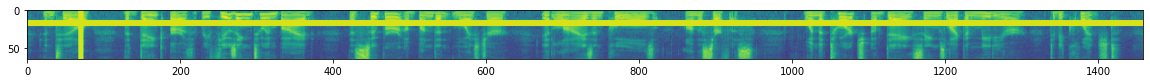

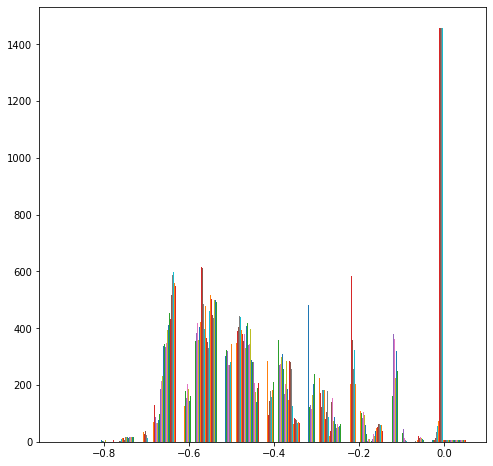

In [6]:
display(trainset, 0, p.sampling_rate)

THAT HAD ITS SOURCE AWAY BACK IN THE WOODS OF THE OLD CUTHBERT PLACE IT WAS REPUTED TO BE AN INTRICATE HEADLONG BROOK IN ITS EARLIER COURSE THROUGH THOSE WOODS WITH DARK SECRETS OF POOL AND CASCADE BUT BY THE TIME IT REACHED LYNDE'S HOLLOW IT WAS A QUIET WELL CONDUCTED LITTLE STREAM in as far as it is possible to a man who sells both scented soap and pilchards would become narrow we do not come into contact with the outside world much save through the medium of potted lobster


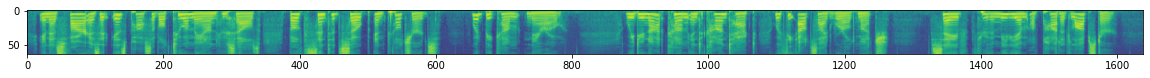

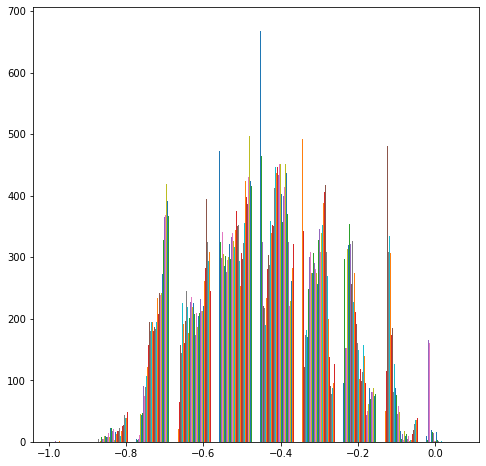

In [7]:
display(testset, 1, p.sampling_rate)